In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(100,1) - 0.5 

In [3]:
X.shape

(100, 1)

In [4]:
y = X[:,0]**2 + 0.02* np.random.rand(100)

In [5]:
df = pd.DataFrame()

In [6]:
df['X'] = X.reshape(100)
df['y'] = y

In [7]:
df

,X,y
0,0.384983,0.154426
1,-0.472252,0.223183
2,-0.312079,0.099477
3,0.041802,0.016219
4,0.082337,0.020292
...,...,...
95,-0.025145,0.007817
96,0.070713,0.014011
97,0.239748,0.058855
98,-0.165180,0.038162


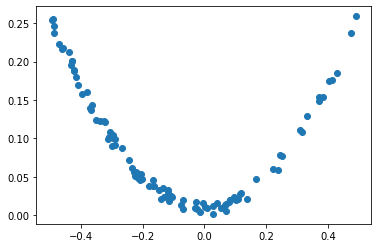

In [8]:
plt.scatter(X,y)

GRADIENT BOOST Step by Step

In [9]:
# Step-1 Prediction of first model is output of mean of y
df['pred1'] = df['y'].mean()

In [10]:
df

,X,y,pred1
0,0.384983,0.154426,0.08843
1,-0.472252,0.223183,0.08843
2,-0.312079,0.099477,0.08843
3,0.041802,0.016219,0.08843
4,0.082337,0.020292,0.08843
...,...,...,...
95,-0.025145,0.007817,0.08843
96,0.070713,0.014011,0.08843
97,0.239748,0.058855,0.08843
98,-0.165180,0.038162,0.08843


In [11]:
# Step-2 calculate the residual for 1st model(pseudo residual = actual output - predicted till now by all models combined)
df['res1'] = df['y'] - df['pred1']

In [12]:
df

,X,y,pred1,res1
0,0.384983,0.154426,0.08843,0.065996
1,-0.472252,0.223183,0.08843,0.134753
2,-0.312079,0.099477,0.08843,0.011047
3,0.041802,0.016219,0.08843,-0.072212
4,0.082337,0.020292,0.08843,-0.068138
...,...,...,...,...
95,-0.025145,0.007817,0.08843,-0.080613
96,0.070713,0.014011,0.08843,-0.074419
97,0.239748,0.058855,0.08843,-0.029575
98,-0.165180,0.038162,0.08843,-0.050269


In [13]:
# Step-3 create 2nd model using Decision tree with res1 as output column
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor(max_leaf_nodes=8)
dt1.fit(df['X'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

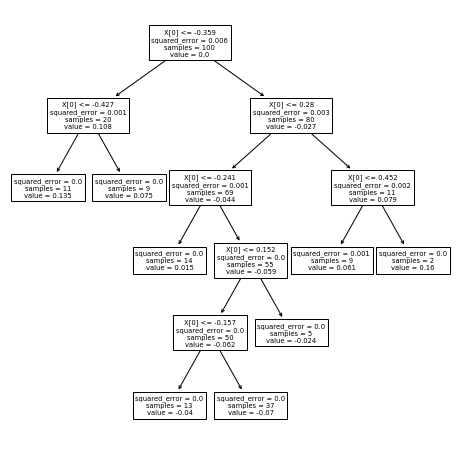

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(dt1)
plt.show()

In [15]:
# test it on random test set
X_test = np.linspace(-0.5, 0.5, 500)

In [16]:
# pred from both models combined pred1+lr*pred2 (here we use learning rate, lr as 1)
y_pred = 0.103859 + dt1.predict(X_test.reshape(500,1))

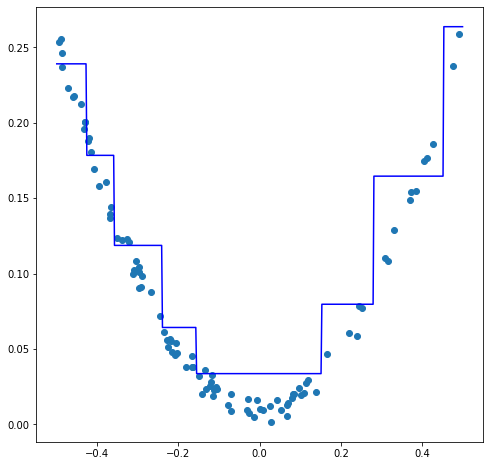

In [17]:
plt.figure(figsize=(8,8))
plt.plot(X_test, y_pred, color='blue')
plt.scatter(df['X'], df['y'])
plt.show()

In [18]:
df['pred2'] = 0.103859 + dt1.predict(df['X'].values.reshape(100,1))

In [19]:
df

,X,y,pred1,res1,pred2
0,0.384983,0.154426,0.08843,0.065996,0.164583
1,-0.472252,0.223183,0.08843,0.134753,0.239022
2,-0.312079,0.099477,0.08843,0.011047,0.118687
3,0.041802,0.016219,0.08843,-0.072212,0.033702
4,0.082337,0.020292,0.08843,-0.068138,0.033702
...,...,...,...,...,...
95,-0.025145,0.007817,0.08843,-0.080613,0.033702
96,0.070713,0.014011,0.08843,-0.074419,0.033702
97,0.239748,0.058855,0.08843,-0.029575,0.079686
98,-0.165180,0.038162,0.08843,-0.050269,0.064292


In [20]:
df['res2'] = df['y'] - df['pred2']

In [21]:
df

,X,y,pred1,res1,pred2,res2
0,0.384983,0.154426,0.08843,0.065996,0.164583,-0.010157
1,-0.472252,0.223183,0.08843,0.134753,0.239022,-0.015839
2,-0.312079,0.099477,0.08843,0.011047,0.118687,-0.019210
3,0.041802,0.016219,0.08843,-0.072212,0.033702,-0.017483
4,0.082337,0.020292,0.08843,-0.068138,0.033702,-0.013410
...,...,...,...,...,...,...
95,-0.025145,0.007817,0.08843,-0.080613,0.033702,-0.025885
96,0.070713,0.014011,0.08843,-0.074419,0.033702,-0.019691
97,0.239748,0.058855,0.08843,-0.029575,0.079686,-0.020830
98,-0.165180,0.038162,0.08843,-0.050269,0.064292,-0.026130


In [22]:
# Step-4 create new decision tree model with res2 as output
dt2 = DecisionTreeRegressor(max_leaf_nodes=8)
dt2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

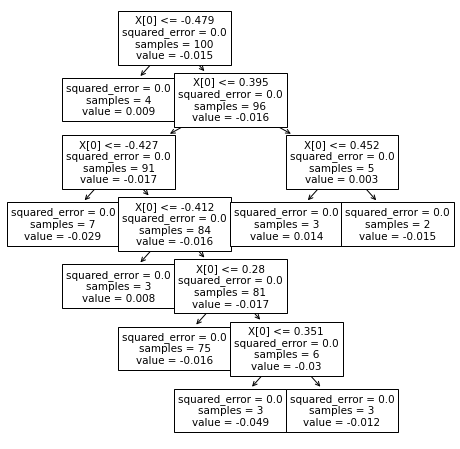

In [23]:
plt.figure(figsize=(8,8))
plot_tree(dt2)
plt.show()

In [24]:
y_pred = 0.103859 + sum(dt.predict(X_test.reshape(-1,1)) for dt in [dt1, dt2])

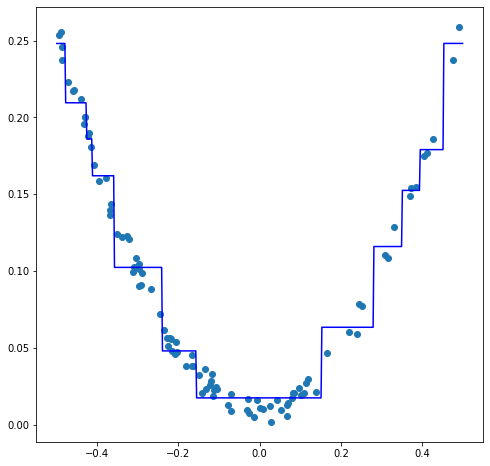

In [25]:
plt.figure(figsize=(8,8))
plt.plot(X_test, y_pred, color='blue')
plt.scatter(df['X'], df['y'])
plt.show()

In [52]:
# General fuction to use any no. of models

def Gradient_Boost(X,y,counter, learning_rate, model_number=1, dt=[], temp=None):

  if counter == 0:
    return
  else:
    if model_number>1:
      y = y - dt[-1].predict(X)
    else:
      temp = y
    
    dt_model = DecisionTreeRegressor(max_leaf_nodes=8, max_depth=4)
    dt_model.fit(X,y)

    dt.append(dt_model)

    x_test = np.linspace(-0.5,0.5,500)

    y_pred = sum(learning_rate*d_tree.predict(x_test.reshape(-1,1)) for d_tree in dt)

    plt.figure()
    plt.plot(x_test, y_pred)
    plt.scatter(X[:,0], temp)
    plt.show()

    Gradient_Boost(X, y, counter-1, learning_rate, model_number+1, dt, temp)




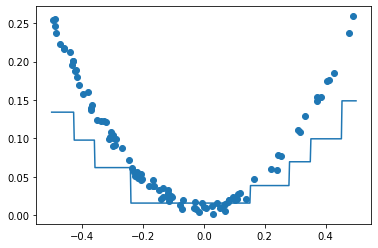

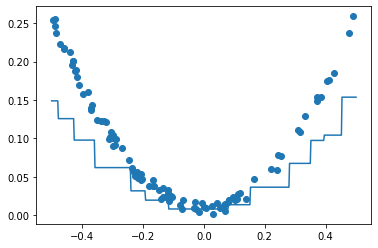

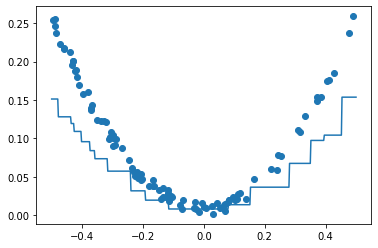

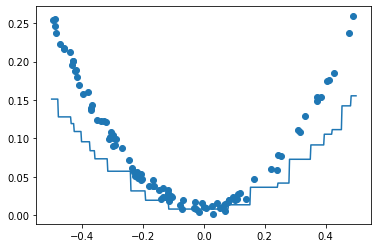

In [53]:
Gradient_Boost(X, y, 4, 0.6)